# Project 
Analyst:    Zach Brown

Assignment: Individual Project 

Purpose:    predict the species of penguin from the remaining data using a k nearest neighbor model and a decision tree model

## **Academic Integrity Statement**

 >By submitting this code for grading, I confirm the following:
>
 > - That this Notebook represents my own unique code created as a solution to the assigned problem <br>
 > - That this Notebook was created specifically to satisfy the requirements detailed in this assignment. 
>
>Other than the textbook and material presented during our class sessions, I received help in       designing and  debugging my >code from the following people and/or websites:
>
> 1. None   

# Organizational Understanding

The goal of this data is to see if we can accurately predict different species of penguin based off of the given features. Accurate prediction of species can be applied to real world scenarios such as research and wildlife conservation. Being able to predict different species based off of features would allow better understanding of specific ecosystem requirements and the needs of individual species

# Data Understanding

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
import matplotlib.pyplot as plt
from sklearn import model_selection as skms
from sklearn import metrics
from sklearn import tree

%precision 4
pd.options.display.precision = 3

In [2]:
penguin = pd.read_csv("../data/penguins_clean.csv")
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.8+ KB


In [3]:
penguin.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.922,5.460,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151,1.975,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915,14.062,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754,801.955,2700.0,3550.000,4050.00,4750.0,6300.0


In [4]:
penguin

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
338,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
339,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
340,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


The data was provided and has no Null values. This type of data is not sensitive and could be accessed through a public data base (probably not cleaned). The attributes are straight forward, but some features such as bill depth and length which seem synonomous, need further insight to understand. All data types are appropriate for each column, but sex could be converted to a category to further clean the data. The non object data types are specified in the column names such as "bill_length_mm" and "body_mass_g", which I would expect from a cleaned data frame.

In [5]:
penguin.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000,-0.235,0.656,0.595
bill_depth_mm,-0.235,1.000,-0.584,-0.472
flipper_length_mm,0.656,-0.584,1.000,0.871
body_mass_g,0.595,-0.472,0.871,1.000


The correlation matrix shows the correlation between different features within the data set. The significance of this is to determine if there are any values that would attribute to one another. Along with this we can see the correlation between this and determing differnt species. 

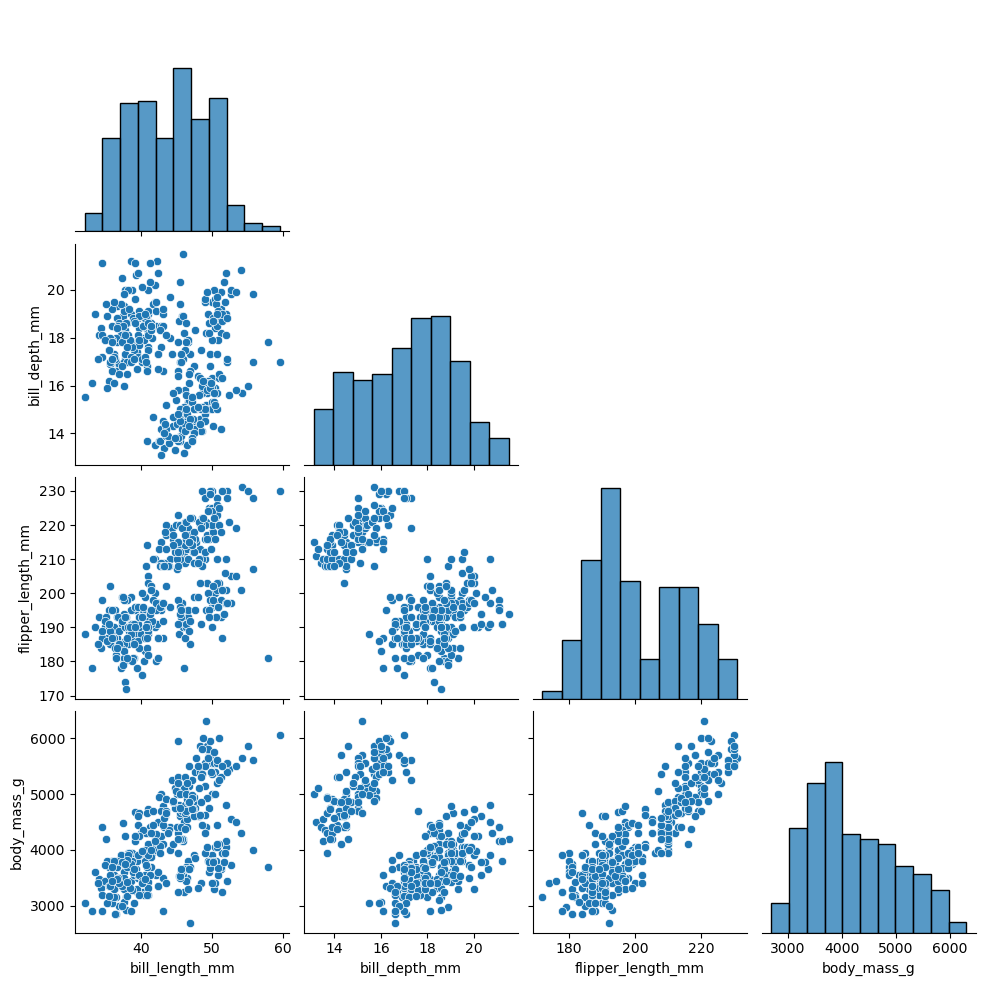

In [6]:
sns.pairplot(penguin, corner = True)

I decided to use a pair plot from the beginning to feel out which type of plot would give me the most insight and potential correlations. I can see a correlation between flipper length and body mass and additionally flipper length and bill length

In [34]:
sns.heatmap(data = penguin.corr().round(2), vmin = -1,
            vmax = 1,
           cmap = 'coolwarm',
           annot = True,
           linewidths = .5)

<AxesSubplot:>

In [8]:
penguin = pd.get_dummies(penguin, columns=['island','sex'], drop_first=False, dtype=int)

In [ ]:
penguin = penguin.drop(columns = 'sex_Unknown')

In [38]:
penguin

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_Female,sex_Male
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,Adelie,36.7,19.3,193.0,3450.0,0,0,1,1,0
4,Adelie,39.3,20.6,190.0,3650.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
337,Gentoo,47.2,13.7,214.0,4925.0,1,0,0,1,0
338,Gentoo,46.8,14.3,215.0,4850.0,1,0,0,1,0
339,Gentoo,50.4,15.7,222.0,5750.0,1,0,0,0,1
340,Gentoo,45.2,14.8,212.0,5200.0,1,0,0,1,0


I decided to use a heatmap to see if there was a better way to look for correlations between the different features. There is nothing particulary out of the ordinary between each of the features. A long flipper correlates to a higher body mass which is reasonable to assume. Bill length and flipper length have some type of correlation which I would also assume is reasonable and not out of the ordinary.

In [39]:
TEST_SIZE = 0.15
RANDOM_STATE = 99

In [48]:
# Separate the target and features in the dataframe
target = penguin['species']
features = penguin.drop(columns = ['species'])

# Split the data in both target and features into train & test sets
tts = skms.train_test_split(features, target,
                            test_size=TEST_SIZE,
                            random_state = RANDOM_STATE)

# Save the parts of the split data in appropriate variables
(train_ftrs, test_ftrs, train_target, test_target) = tts


In [41]:
stdsc = StandardScaler()
train_std = stdsc.fit_transform(train_ftrs)
test_std = stdsc.transform(test_ftrs)

In [42]:
K = 5
model = neighbors.KNeighborsClassifier(n_neighbors=K)
fit   = model.fit(train_std, train_target)
preds = fit.predict(test_std)

C:\Users\ATTRM\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [43]:
metrics.accuracy_score(test_target, preds)

0.9807692307692307

In [44]:
results = pd.DataFrame()
results['actual'] = test_target
results['predicted'] = preds
results.tail(20)

,actual,predicted
137,Adelie,Adelie
84,Adelie,Adelie
37,Adelie,Adelie
118,Adelie,Adelie
10,Adelie,Adelie
211,Chinstrap,Chinstrap
53,Adelie,Adelie
61,Adelie,Adelie
191,Chinstrap,Chinstrap
155,Chinstrap,Chinstrap


In [49]:
# create & fit a tree to the training data
# run default first, then add max_depth option after plotting
model = tree.DecisionTreeClassifier()
fit   = model.fit(train_ftrs, train_target)

# what is the accuracy on the test data?
fit.score(test_ftrs,test_target)

1.0

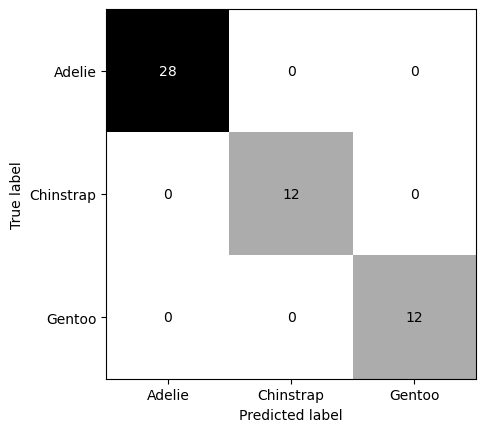

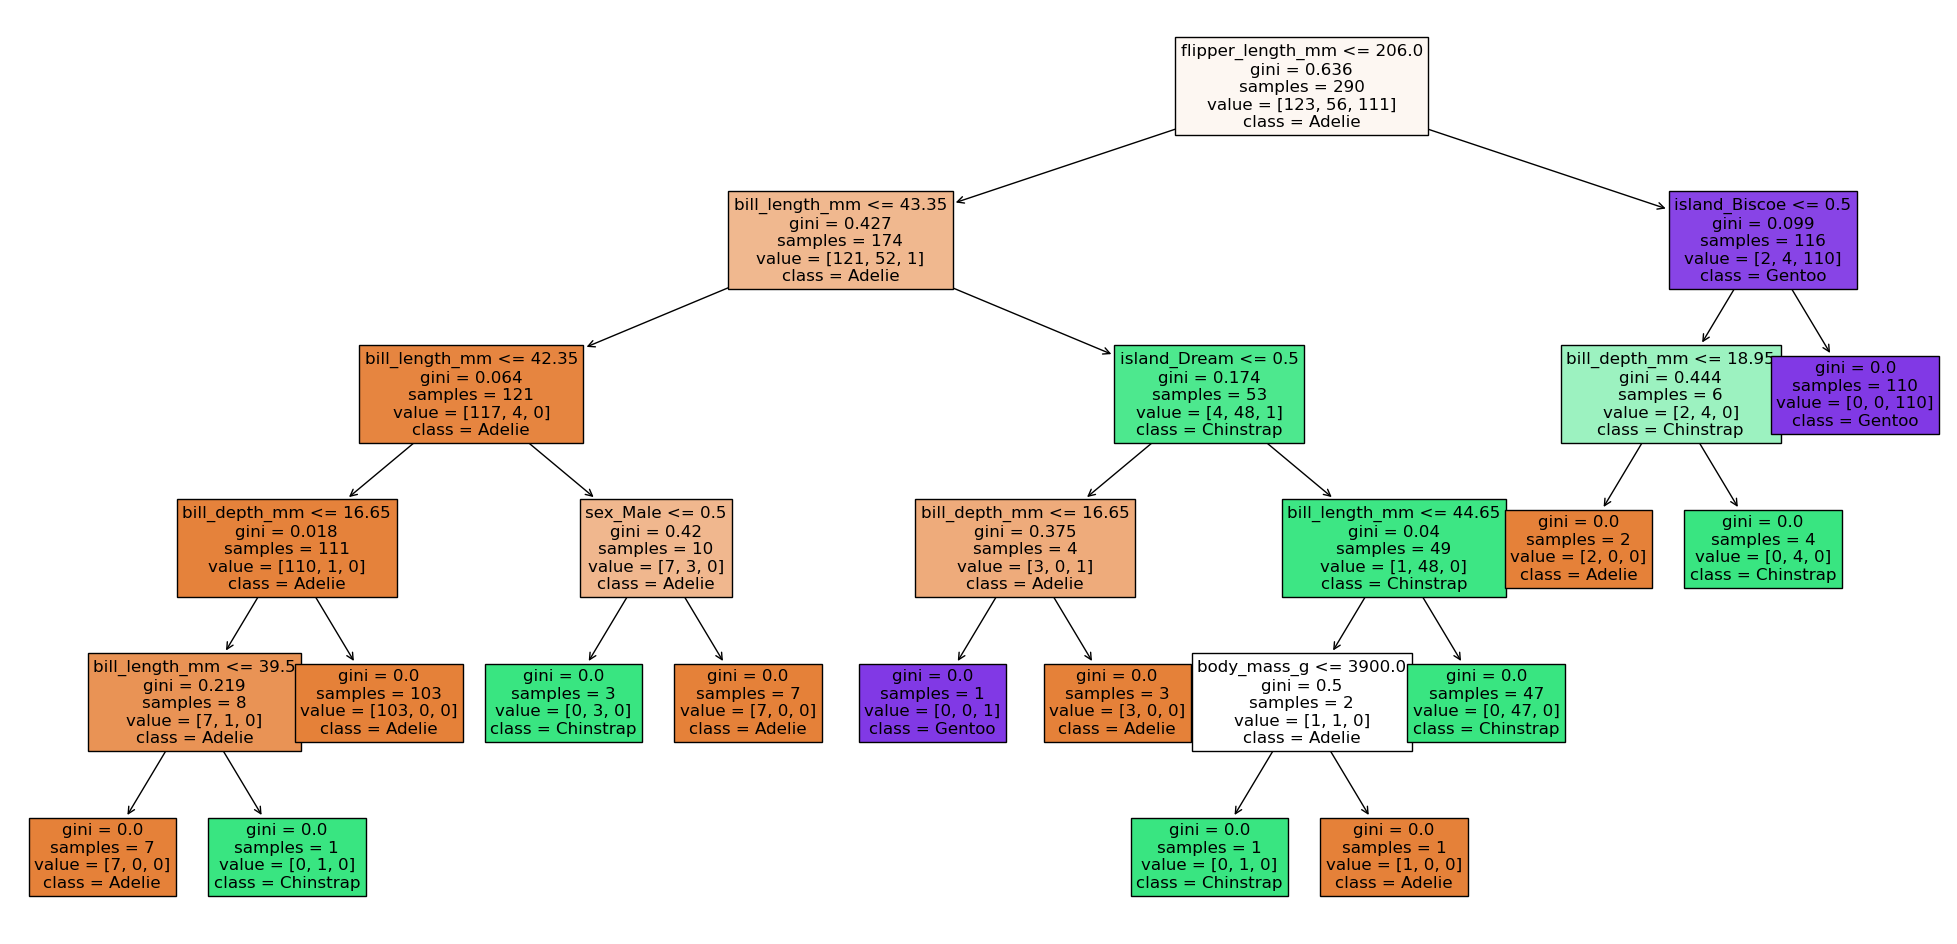

In [50]:
plt.figure(figsize=(25,12))  # adjust the overall size

# first time - then change max depth and the options below
#tree.plot_tree(fit)

# there are options we can change to make it look better
tree.plot_tree(fit,
              feature_names = test_ftrs.columns.tolist(),
              class_names = model.classes_.tolist(),
              filled = True,
              fontsize = 12)
plt.show()

In [52]:
# predict values using the test data
preds = fit.predict(test_ftrs)

# display confusion matrix 
metrics.ConfusionMatrixDisplay.from_predictions(test_target,
                                                preds,
                                                colorbar=False,
                                                cmap='Greys')

# display classification report
print(metrics.classification_report(test_target,
                                    preds,
                                    digits=4,
                                    zero_division=0))

              precision    recall  f1-score   support

      Adelie     1.0000    1.0000    1.0000        28
   Chinstrap     1.0000    1.0000    1.0000        12
      Gentoo     1.0000    1.0000    1.0000        12

    accuracy                         1.0000        52
   macro avg     1.0000    1.0000    1.0000        52
weighted avg     1.0000    1.0000    1.0000        52

